# Mobile Money Fraud Detection

This notebook provides a comprehensive analysis of the synthetic Mobile Money Transaction dataset. The analysis includes data cleaning, preprocessing, feature engineering, and modeling to predict fraudulent claims. The dataset is sourced from [Mobile Money Data](https://data.mendeley.com/datasets/zhj366m53p/1) and contains various features related to mobile money including categorical and numerical variables. The goal is to build a predictive model that can identify fraudulent transactions based on the provided features. The analysis is structured as follows: 
- Download the dataset
- Load the dataset
- Explore the dataset
- Clean and preprocess the data
- Perform feature engineering
- Build and evaluate a predictive model
- Conclude with insights and findings


In [1]:
# Download dataset using requests

import os
import warnings

import requests

warnings.filterwarnings("ignore")

url = "https://prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com/zhj366m53p-1.zip"
local_file_name = "mobile_money_transaction_data.zip"
data_path = "data"

if not os.path.exists(data_path):
    os.makedirs(data_path)

local_file_name = os.path.join(data_path, local_file_name)

if not os.path.exists(local_file_name):
    response = requests.get(url)
    if response.status_code == 200:
        with open(local_file_name, 'wb') as f:
            f.write(response.content)
        print(f"Downloaded {local_file_name}")
    else:
        print(f"Failed to download file: {response.status_code}")

## 1. Loading the Dataset
The dataset is downloaded and unzipped. The dataset contains various features related to mobile money transactions including categorical and numerical variables. The goal is to build a predictive model that can identify fraudulent claims based on the provided features.

In [2]:
# Unzip the downloaded file
import zipfile
import shutil

zip_file_path = local_file_name
unzip_dir = os.path.join(data_path, "Synthetic Mobile Money Transaction Dataset")
if os.path.exists(unzip_dir):
    shutil.rmtree(unzip_dir)
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(data_path)

In [3]:
# Load the dataset
import pandas as pd
import glob

unzip_dir = os.path.join(data_path, "Synthetic Mobile Money Transaction Dataset")
csv_files = glob.glob(os.path.join(unzip_dir, "*.csv"))
if len(csv_files) == 0:
    raise ValueError("No Excel files found in the directory.")
# Load the first Excel file
df = pd.read_csv(csv_files[0])

In [4]:
# print size of the dataset
print(f"Dataset shape: {df.shape}")

Dataset shape: (1720181, 10)


In [5]:
# Sample the dataset to 10% of its size to keep the analysis manageable
df = df.sample(frac=0.1, random_state=42).reset_index(drop=True)
print(f"Sampled dataset shape: {df.shape}")

Sampled dataset shape: (172018, 10)


## 2. Exploring the Dataset

We will explore the dataset to understand its structure, data types, and basic statistics. This step is crucial for identifying any potential issues with the data and determining the appropriate preprocessing steps.

In [6]:
# Display the first few rows of the dataset
df.head(25)

,step,transactionType,amount,initiator,oldBalInitiator,newBalInitiator,recipient,oldBalRecipient,newBalRecipient,isFraud
0,14,DEPOSIT,96333.22,4504001232088071,2750936.64,2847269.86,62-0001958,2349.86,2349.86,0
1,12,DEPOSIT,355989.60,4190745217767716,3634818.22,3990807.82,23-0009283,5892.13,5892.13,0
2,125,TRANSFER,35430.36,4887319384131524,1894959.47,1859529.11,4937461976837637,33816.73,69247.09,0
3,110,PAYMENT,730.00,4886081055364583,3610571.73,3609841.73,62-0000854,255163.58,255893.58,0
4,84,TRANSFER,17062.90,4547384260246244,2261172.23,2244109.33,4200228870629380,0.00,17062.90,0
5,18,DEPOSIT,140100.92,4842669337230011,2800073.55,2940174.47,03-0006419,21131.05,21131.05,0
6,74,PAYMENT,566.70,4265003660877768,2427472.59,2426905.89,05-0008090,133752.27,134318.97,0
7,87,TRANSFER,143656.73,4718463952322787,677911.51,534254.78,4013865394432788,160093.79,303750.53,0
8,101,TRANSFER,16840.63,4825236196007525,2092469.56,2075628.94,4762689479358244,0.00,16840.63,0
9,69,TRANSFER,19220.28,4820883338956112,3311643.37,3292423.09,4727715202260581,17567.84,36788.12,0


In [7]:
# Check the shape of the dataset
df.shape

(172018, 10)

In [8]:
# Check the columns of the dataset
df.columns

Index(['step', 'transactionType', 'amount', 'initiator', 'oldBalInitiator',
       'newBalInitiator', 'recipient', 'oldBalRecipient', 'newBalRecipient',
       'isFraud'],
      dtype='object')

In [9]:
# Check the data types of the columns
df.dtypes

step                 int64
transactionType     object
amount             float64
initiator            int64
oldBalInitiator    float64
newBalInitiator    float64
recipient           object
oldBalRecipient    float64
newBalRecipient    float64
isFraud              int64
dtype: object

In [10]:
# treat some columns as categorical
cat_cols = ['initiator', 'isFraud']
for col in cat_cols:
    df[col] = df[col].astype('object')

In [11]:
print("\nDescriptive Statistics (Object):")
print(df.describe(include='object'))


Descriptive Statistics (Object):
       transactionType         initiator   recipient  isFraud
count           172018            172018      172018   172018
unique               5             10793       11824        2
top            PAYMENT  4654047633050507  01-0007626        0
freq             67275               195          48   154541


In [12]:
print("\nDescriptive Statistics (Numerical):")
print(df.describe())


Descriptive Statistics (Numerical):
                step        amount  oldBalInitiator  newBalInitiator  \
count  172018.000000  1.720180e+05     1.720180e+05     1.720180e+05   
mean       65.688893  5.265153e+04     2.438282e+06     2.447805e+06   
std        44.636299  8.966806e+04     1.307307e+06     1.296526e+06   
min         0.000000  3.690000e+00    -1.999971e+05    -1.999971e+05   
25%        23.000000  6.048500e+02     1.584571e+06     1.610167e+06   
50%        55.000000  1.725903e+04     2.623527e+06     2.628380e+06   
75%       106.000000  7.128634e+04     3.362894e+06     3.361387e+06   
max       143.000000  1.809223e+06     1.121984e+07     1.138186e+07   

       oldBalRecipient  newBalRecipient  
count     1.720180e+05     1.720180e+05  
mean      1.090974e+05     1.231515e+05  
std       2.811758e+05     3.188636e+05  
min      -1.568262e+05     0.000000e+00  
25%       1.630631e+04     2.514649e+04  
50%       6.391324e+04     7.496761e+04  
75%       1.381469e+

## 3. Data Cleaning and Preprocessing

We will clean the dataset by handling missing values, converting categorical variables to numerical format, and removing any unnecessary columns. This step is essential for preparing the data for modeling. 

In [13]:
# Count data cells with '?' missing values
missing_values_question_mark = (df == '?').sum().sort_values(ascending=False)
print("Missing Values (represented as '?'):")
print(missing_values_question_mark[missing_values_question_mark > 0])

Missing Values (represented as '?'):
Series([], dtype: int64)


In [14]:
# df['hour_of_day'] = df['step'] % 24
print("Created 'hour_of_day' feature.")

# Create 'day_of_week' (0-6, assuming simulation starts on day 0)
# df['day_of_week'] = (df['step'] // 24) % 7
print("Created 'day_of_week' feature.")

df.drop('step', axis=1, inplace=True)

Created 'hour_of_day' feature.
Created 'day_of_week' feature.


In [15]:
# Check for missing values
missing_percentage = (df.isna().sum() / len(df)) * 100
print("\nMissing values percentage per column:")
print(missing_percentage[missing_percentage > 0].sort_values(ascending=False))


Missing values percentage per column:
Series([], dtype: float64)


## 4. Feature Engineering

We will perform feature engineering by converting categorical variables to numerical format, dropping unnecessary columns, and encoding the target variable. This step is crucial for preparing the data for modeling.

In [16]:
# Drop columns unlikely to be useful for prediction or unique identifiers
cols_to_drop = ['initiator', 'recipient']
df.drop(cols_to_drop, axis=1, inplace=True)
print(f"\nDropped columns: {cols_to_drop}")


Dropped columns: ['initiator', 'recipient']


In [17]:
from sklearn.preprocessing import LabelEncoder

target_col = 'isFraud'
print(f"Unique values in target column: {df[target_col].unique()}")
le = LabelEncoder()
df[target_col] = le.fit_transform(df[target_col])
print(f"Target variable '{target_col}' encoded to 0/1 (Original classes: {le.classes_})")
print(f"Value counts after encoding:\n{df[target_col].value_counts()}")

# Keep a clean copy for the PyCaret setup (pre-PCA)
df_cleaned = df.copy()

Unique values in target column: [0 1]
Target variable 'isFraud' encoded to 0/1 (Original classes: [0 1])
Value counts after encoding:
isFraud
0    154541
1     17477
Name: count, dtype: int64


## 5. Exploratory Data Analysis (EDA)

We will perform exploratory data analysis (EDA) to visualize the distribution of the target variable and analyze the correlation between features. This step is essential for understanding the relationships between variables and identifying potential patterns in the data.


Analyzing target variable distribution...
isFraud
0    89.840017
1    10.159983
Name: proportion, dtype: float64


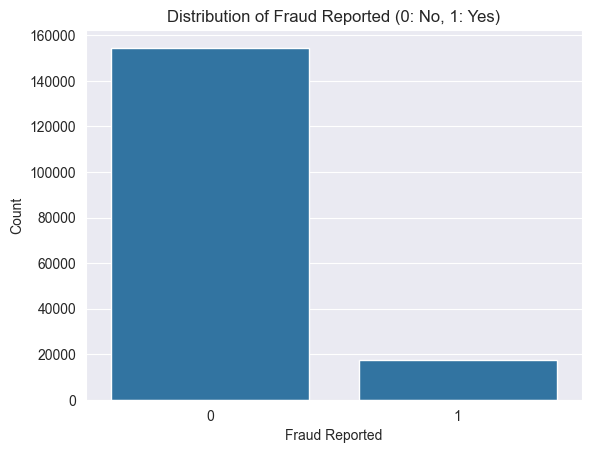

In [18]:
from matplotlib import pyplot as plt
import seaborn as sns

print("\nAnalyzing target variable distribution...")
target_counts = df_cleaned[target_col].value_counts(normalize=True) * 100
print(target_counts)
sns.countplot(x=df_cleaned[target_col])
plt.title('Distribution of Fraud Reported (0: No, 1: Yes)')
plt.xlabel('Fraud Reported')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=le.classes_)
plt.show()

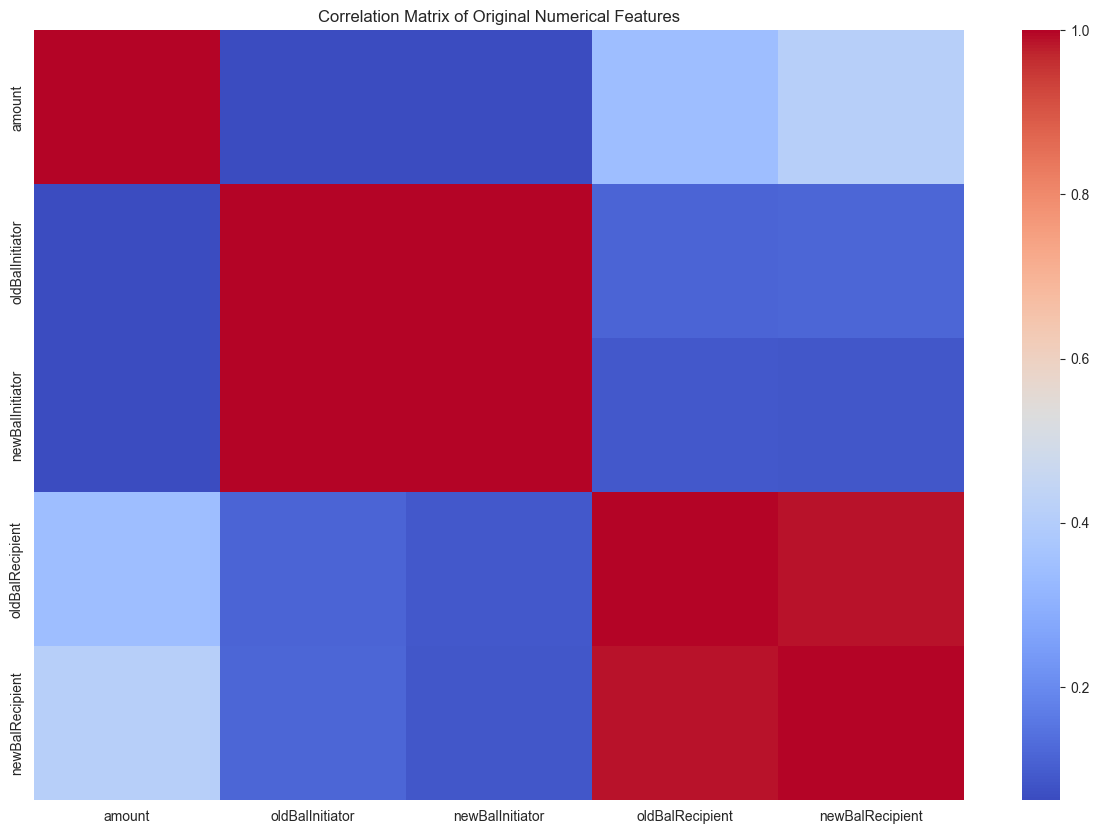

In [19]:
import numpy as np

# Correlation Matrix (Numerical Features Only)
numerical_features_eda = df_cleaned.select_dtypes(include=np.number).drop(target_col, axis=1).columns.tolist()
plt.figure(figsize=(15, 10))
sns.heatmap(df_cleaned[numerical_features_eda].corr(), annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Original Numerical Features')
plt.show()

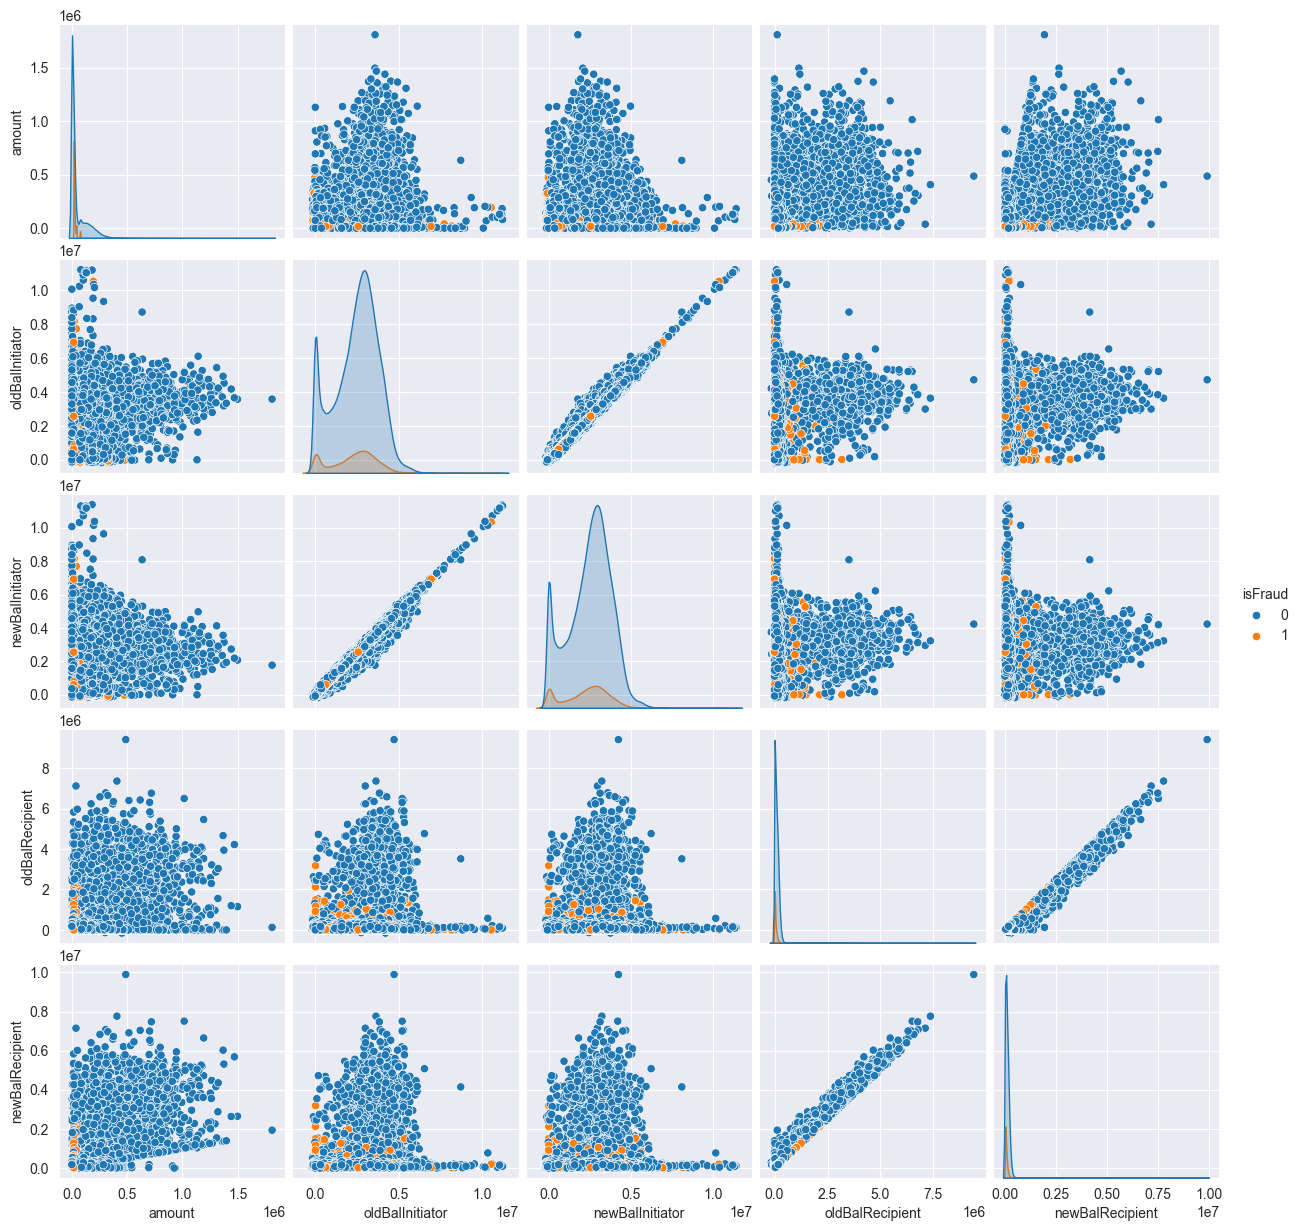

In [21]:
sns.pairplot(df_cleaned, hue='isFraud')
plt.show()

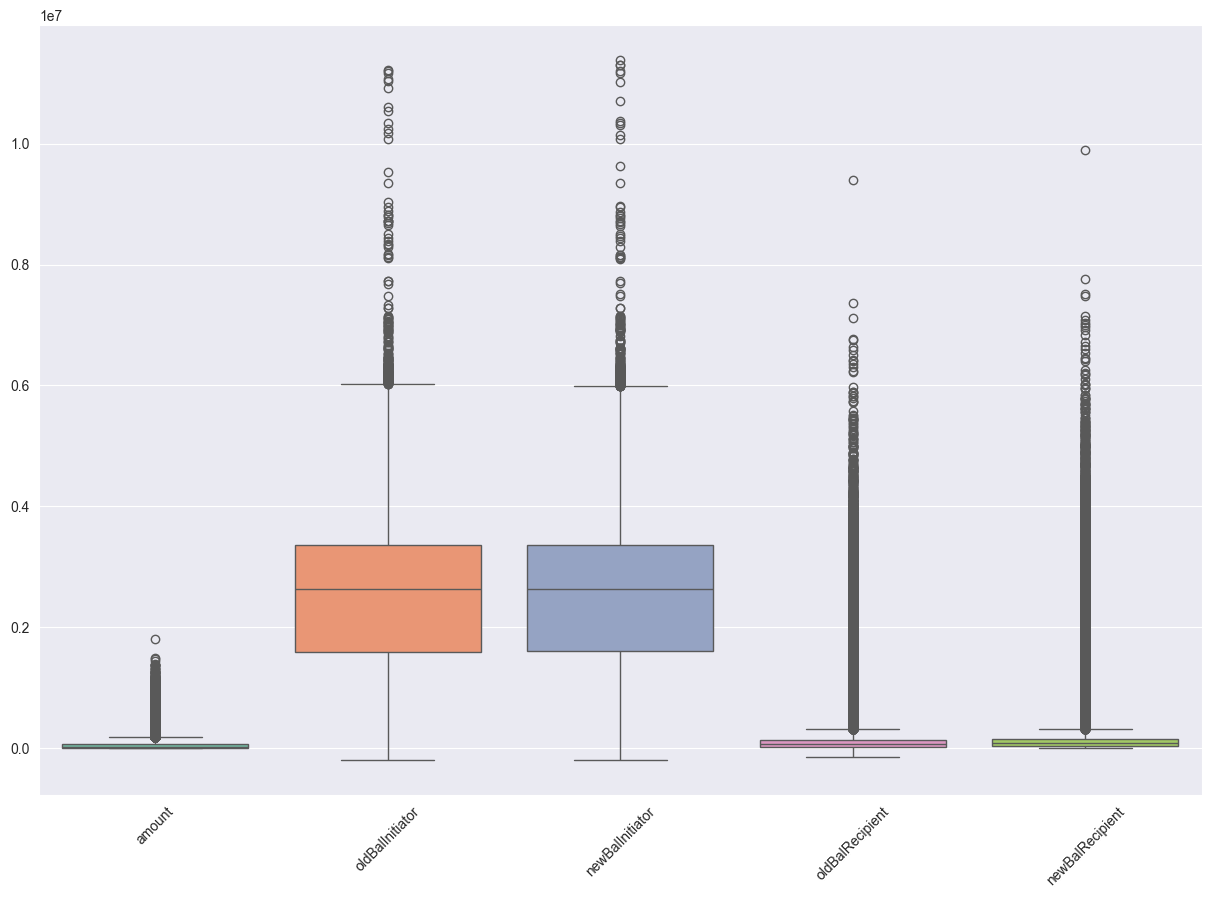

In [22]:
plt.figure(figsize=(15, 10))
ax = sns.boxplot(data=df_cleaned[df_cleaned.drop(target_col, axis=1).columns.tolist()], orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

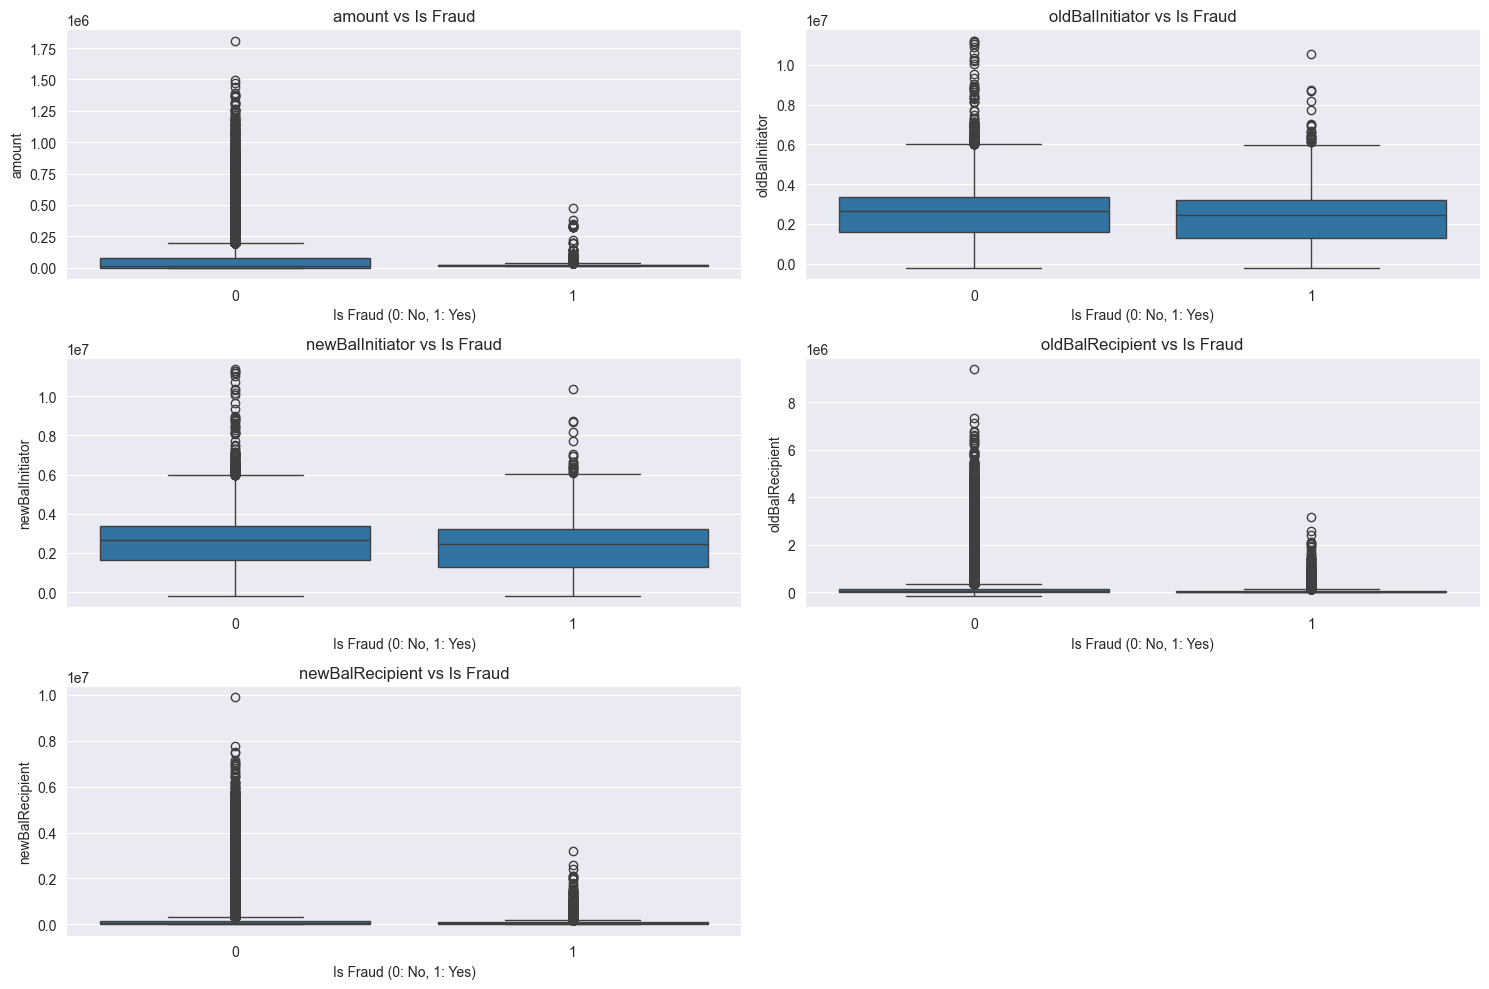

In [23]:
# Box plot for all numerical features vs target
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features_eda):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(x=df_cleaned[target_col], y=df_cleaned[col])
    plt.title(f'{col} vs Is Fraud')
    plt.xlabel('Is Fraud (0: No, 1: Yes)')
    plt.ylabel(col)
    plt.xticks(ticks=[0, 1], labels=le.classes_)
plt.tight_layout()
plt.show()

## 6. Principal Component Analysis (PCA)

We will perform PCA to reduce the dimensionality of the dataset while retaining most of the variance. This step is crucial for improving the performance of the model and reducing overfitting.

In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

print("\nPreparing data specifically for PCA (scaling, encoding)...")
X_pca_prep = df_cleaned.drop(target_col, axis=1)
y_pca_prep = df_cleaned[target_col]

numerical_features = X_pca_prep.select_dtypes(include=np.number).columns.tolist()
categorical_features = X_pca_prep.select_dtypes(include='object').columns.tolist()

numerical_pipeline_pca = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
categorical_pipeline_pca = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])
preprocessor_pca = ColumnTransformer([
    ('num', numerical_pipeline_pca, numerical_features),
    ('cat', categorical_pipeline_pca, categorical_features)
], remainder='passthrough')


Preparing data specifically for PCA (scaling, encoding)...


In [21]:
X_processed_pca = preprocessor_pca.fit_transform(X_pca_prep)
print(f"Shape of data preprocessed for PCA: {X_processed_pca.shape}")

Shape of data preprocessed for PCA: (172018, 10)


In [22]:
from sklearn.decomposition import PCA

print("\nFitting PCA and plotting explained variance ratio...")
pca_full = PCA()
X_pca_full = pca_full.fit_transform(X_processed_pca)


Fitting PCA and plotting explained variance ratio...


Text(0, 0.5, '$Z_2$')

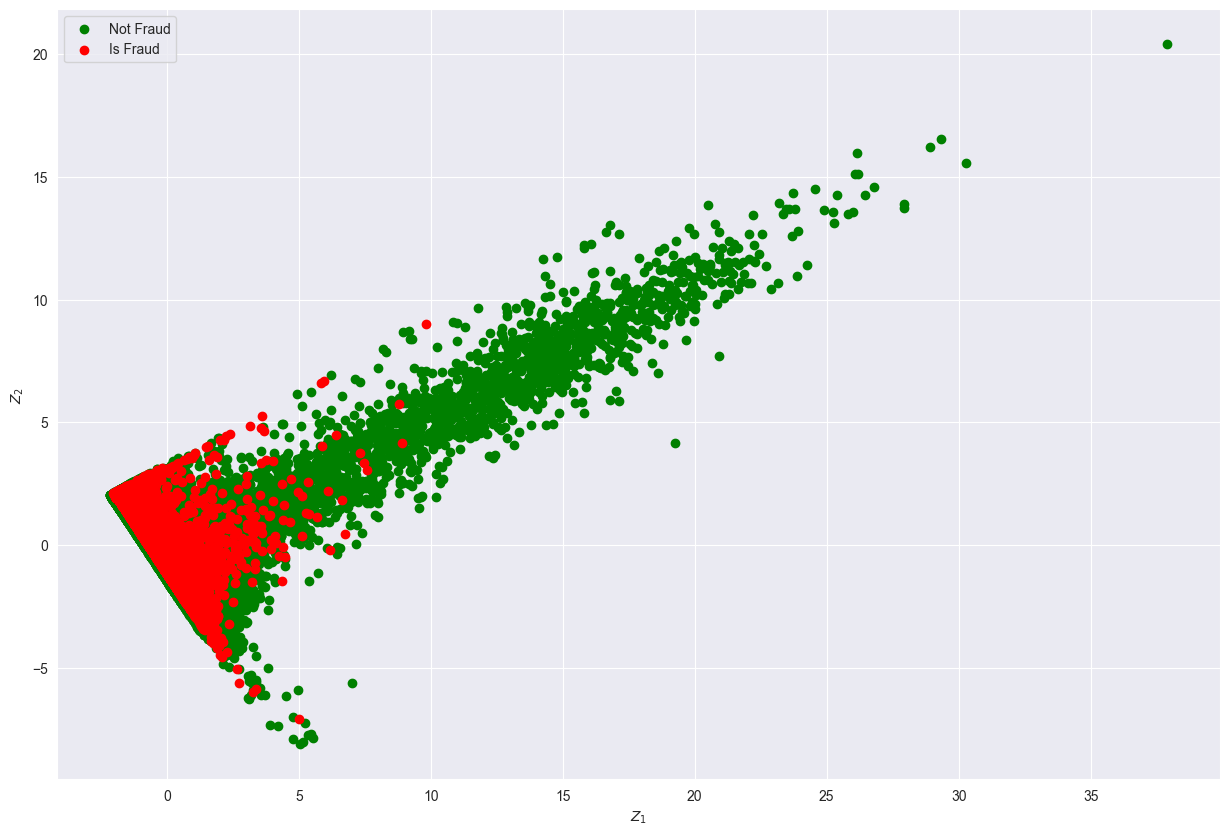

In [23]:
# PCA Score Plot

idx_no_fraud = np.where(y_pca_prep == 0)
idx_yes_fraud = np.where(y_pca_prep == 1)

plt.figure(figsize=(15, 10))
plt.scatter(X_pca_full[idx_no_fraud, 0], X_pca_full[idx_no_fraud, 1], c='g', label='Not Fraud')
plt.scatter(X_pca_full[idx_yes_fraud, 0], X_pca_full[idx_yes_fraud, 1], c='r', label='Is Fraud')

plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

array([[ 3.48382620e-01,  2.17474294e-01,  8.13403946e-01,
        -1.10576543e-01,  3.62327964e-01,  1.12725946e-01,
        -1.09864566e-01,  2.07121858e-02,  3.15185863e-02,
        -2.64499414e-15],
       [ 3.74742056e-01, -5.98218203e-01, -7.20247766e-03,
         1.99781660e-02,  4.93563170e-02, -1.61619023e-02,
         2.55847317e-01, -4.95026532e-02,  6.56236813e-01,
         1.27608412e-14],
       [ 3.60893525e-01, -6.08505605e-01,  2.01651516e-02,
        -1.80907137e-02, -7.42887424e-02,  5.88698090e-02,
        -2.54274852e-01,  5.00592902e-02, -6.50074442e-01,
        -1.26966736e-14],
       [ 5.44947064e-01,  3.28940224e-01, -3.10461805e-01,
        -2.57877861e-02, -2.03377343e-01, -1.29334169e-01,
        -6.11014572e-01,  8.58746876e-02,  2.42850867e-01,
        -2.98982076e-15],
       [ 5.55697100e-01,  3.37586798e-01, -2.44565905e-01,
         4.64126486e-02,  3.01997526e-02,  7.35536600e-02,
         6.51711979e-01, -9.21623335e-02, -2.75181223e-01,
         3.

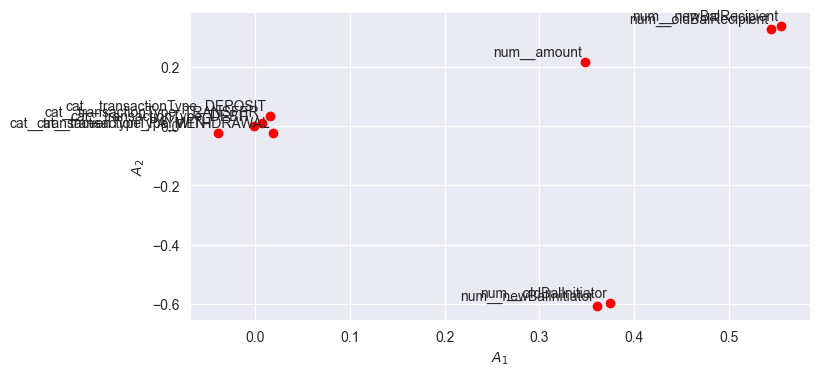

In [28]:
# PCA Loading Plot 
A = pca_full.components_.T
plt.figure(figsize=(8, 4))

columns = preprocessor_pca.get_feature_names_out()

plt.scatter(A[:, 0], A[:, 1], c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(columns, A[:, 0], A[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')
A

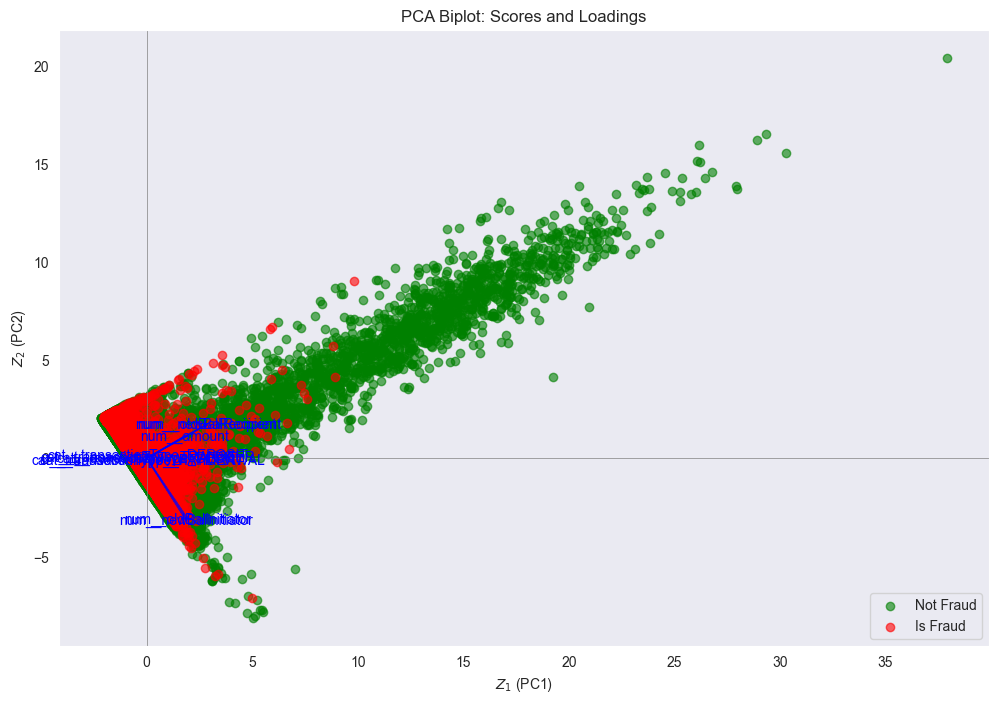

In [29]:
# PCA Full Biplot
A = pca_full.components_.T[:, :2]

idx_no_fraud = np.where(y_pca_prep == 0)
idx_yes_fraud = np.where(y_pca_prep == 1)

plt.figure(figsize=(12, 8))

# Plot PCA scores (data)
plt.scatter(X_pca_full[idx_no_fraud, 0], X_pca_full[idx_no_fraud, 1], c='g', label='Not Fraud', alpha=0.6)
plt.scatter(X_pca_full[idx_yes_fraud, 0], X_pca_full[idx_yes_fraud, 1], c='r', label='Is Fraud', alpha=0.6)

# Use correct feature names
columns = preprocessor_pca.get_feature_names_out()
for i in range(A.shape[0]):
    plt.arrow(0, 0, A[i, 0] * 5, A[i, 1] * 5, color='b', alpha=0.7, head_width=0.1)
    plt.text(A[i, 0] * 5.2, A[i, 1] * 5.2, columns[i], color='b', ha='center', va='center')

plt.axhline(0, color='gray', lw=0.5)
plt.axvline(0, color='gray', lw=0.5)
plt.xlabel('$Z_1$ (PC1)')
plt.ylabel('$Z_2$ (PC2)')
plt.legend()
plt.title('PCA Biplot: Scores and Loadings')
plt.grid()
plt.show()

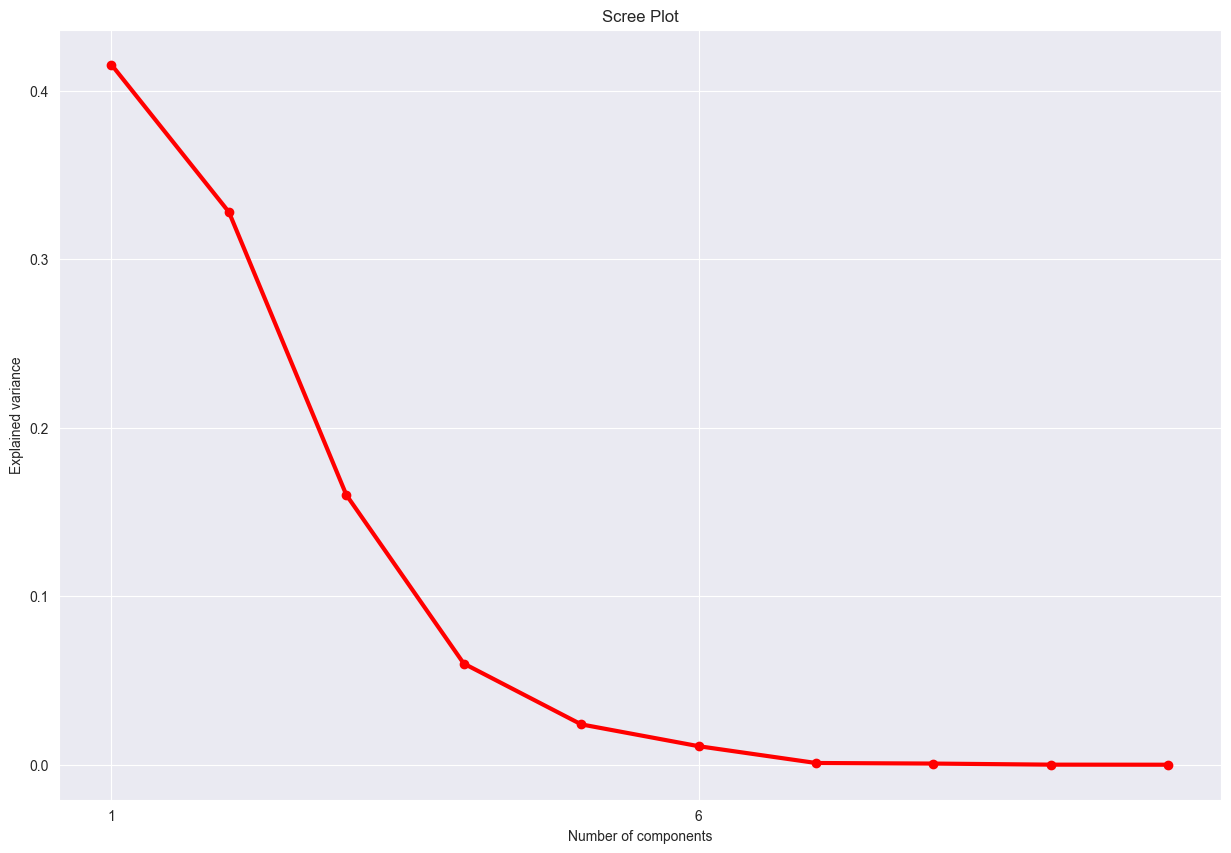

array([2.36182729e+00, 1.86471552e+00, 9.10245526e-01, 3.41289660e-01,
       1.36165833e-01, 6.25343491e-02, 5.82128720e-03, 3.86817085e-03,
       2.13975955e-04, 3.84534556e-30])

In [30]:
# Eigenvalues
Lambda = pca_full.explained_variance_

# Scree plot
x = np.arange(len(Lambda)) + 1
plt.figure(figsize=(15, 10))
plt.plot(x, Lambda / sum(Lambda), 'ro-', lw=3)

interval = 5
xticks = np.arange(1, len(Lambda) + 1, interval)
plt.xticks(xticks, [str(i) for i in xticks], rotation=0)

plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.title('Scree Plot')
plt.grid(True)
plt.show()
Lambda

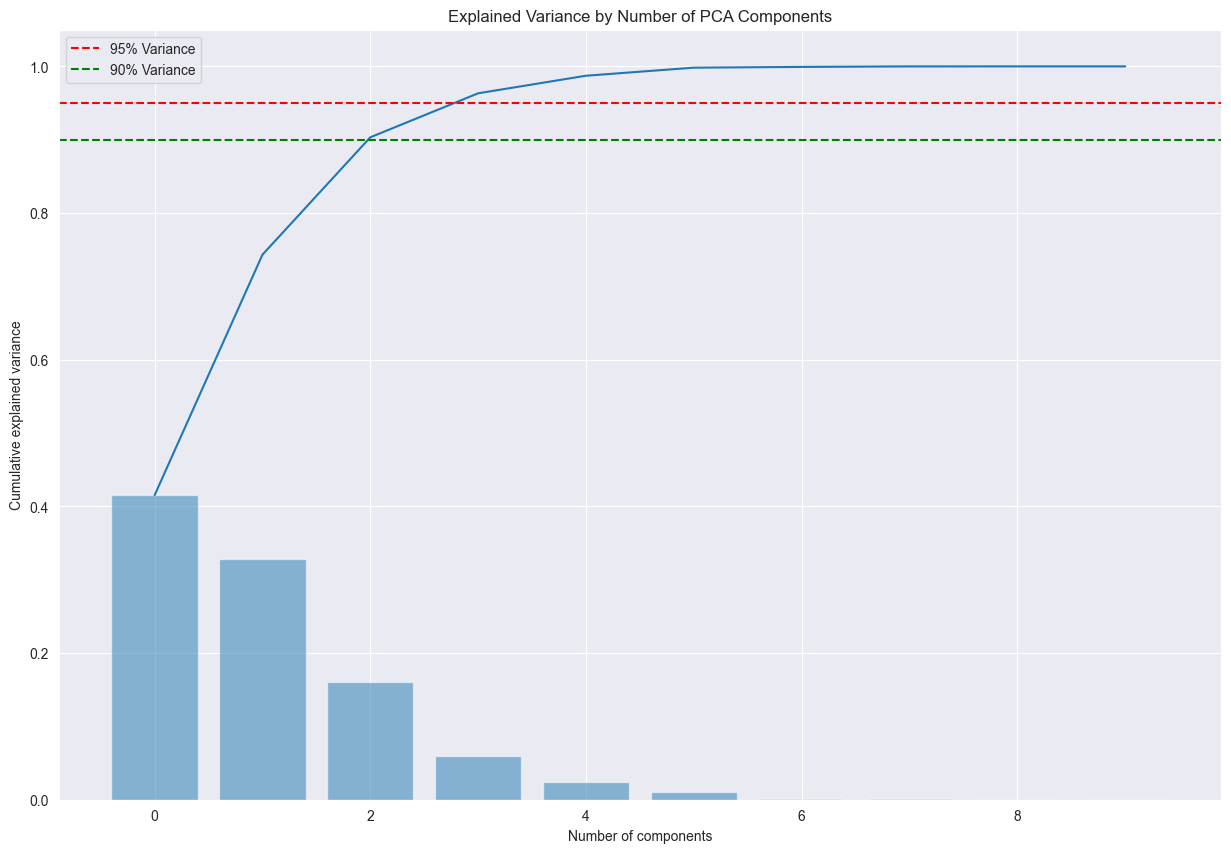

In [31]:
ell = pca_full.explained_variance_ratio_
ind = np.arange(len(ell))
plt.figure(figsize=(15, 10))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
plt.axhline(y=0.90, color='g', linestyle='--', label='90% Variance')
plt.legend(loc='best')
plt.title('Explained Variance by Number of PCA Components')
plt.show()

In [24]:
# Choose number of components to retain 95% variance
variance_threshold = 0.95
n_components = np.argmax(np.cumsum(pca_full.explained_variance_ratio_) >= variance_threshold) + 1
print(f"\nNumber of components to capture >= {variance_threshold * 100}% variance: {n_components}")

print(f"Applying PCA transformation with n_components={n_components}...")
pca = PCA(n_components=n_components)
X_pca_final = pca.fit_transform(X_processed_pca)
print(f"Shape of data after PCA: {X_pca_final.shape}")


Number of components to capture >= 95.0% variance: 4
Applying PCA transformation with n_components=4...
Shape of data after PCA: (172018, 4)


In [25]:
# Convert PCA result to DataFrame
pca_columns = [f'PC{i + 1}' for i in range(n_components)]
X_pca_df = pd.DataFrame(X_pca_final, columns=pca_columns)

# Prepare PCA data for PyCaret: Add the target variable back
df_pca_pycaret = X_pca_df.copy()
df_pca_pycaret[target_col] = y_pca_prep

print("First 5 rows of PCA components:")
X_pca_df.head()

First 5 rows of PCA components:


,PC1,PC2,PC3,PC4
0,-0.023098,-0.444087,0.966460,-0.233534
1,1.570450,-0.747606,3.328170,-0.555995
2,-0.610121,0.349167,-0.011519,0.814228
3,0.941283,-0.921539,-0.963067,-0.498504
4,-0.625942,-0.138266,-0.096808,0.832615


## 7. ML Modeling

We will build and evaluate a predictive model using PyCaret. We will compare the performance of models on both the original cleaned data and the PCA-transformed data. This step is crucial for identifying the best model for predicting fraudulent claims.

In [34]:
from pycaret.classification import setup, compare_models, pull

print("\n>>> Setting up PyCaret on ORIGINAL cleaned data... <<<")
numerical_features_pycaret = df_cleaned.select_dtypes(include=np.number).drop(target_col, axis=1).columns.tolist()
categorical_features_pycaret = df_cleaned.select_dtypes(include='object').columns.tolist()

SESSION_ID = 42

clf_orig = setup(data=df_cleaned,
                 target=target_col,
                 train_size=0.7,
                 imputation_type="simple",
                 numeric_imputation="mean",
                 categorical_imputation="mode",
                 session_id=SESSION_ID,
                 numeric_features=numerical_features_pycaret,
                 categorical_features=categorical_features_pycaret,
                 normalize=True,
                 fix_imbalance=True,
                 fix_imbalance_method="SMOTE",
                 log_experiment=False,
                 fold=10,
                 verbose=True)


>>> Setting up PyCaret on ORIGINAL cleaned data... <<<


,Description,Value
0,Session id,42
1,Target,isFraud
2,Target type,Binary
3,Original data shape,"(172018, 7)"
4,Transformed data shape,"(267962, 11)"
5,Transformed train set shape,"(216356, 11)"
6,Transformed test set shape,"(51606, 11)"
7,Numeric features,5
8,Categorical features,1
9,Preprocess,True


In [35]:
print("\n>>> Comparing models on ORIGINAL data... <<<")
best_model_orig = compare_models(sort='F1', n_select=3)
print("\nOriginal Data - Top Models Comparison:")
results_orig_compare = pull()
print(results_orig_compare)


>>> Comparing models on ORIGINAL data... <<<


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:55:32
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7853,0.8891,0.9989,0.3211,0.4860,0.3926,0.4939,0.3420
nb,Naive Bayes,0.7858,0.8808,0.9957,0.3212,0.4858,0.3924,0.4929,0.0660
ada,Ada Boost Classifier,0.7888,0.8884,0.9772,0.3222,0.4846,0.3916,0.4873,1.0100
ridge,Ridge Classifier,0.7838,0.8888,0.9998,0.3197,0.4844,0.3906,0.4926,0.0760
gbc,Gradient Boosting Classifier,0.7872,0.8886,0.9837,0.3213,0.4844,0.3911,0.4886,4.2160
lda,Linear Discriminant Analysis,0.7838,0.8888,0.9998,0.3197,0.4844,0.3906,0.4926,0.0850
lightgbm,Light Gradient Boosting Machine,0.7884,0.8873,0.9717,0.3211,0.4827,0.3894,0.4841,0.7280
svm,SVM - Linear Kernel,0.7821,0.8879,0.9995,0.3180,0.4825,0.3882,0.4906,0.0830
knn,K Neighbors Classifier,0.8157,0.8605,0.7434,0.3232,0.4505,0.3598,0.4050,0.3810
et,Extra Trees Classifier,0.8339,0.8838,0.5975,0.3266,0.4223,0.3349,0.3558,1.2220



Original Data - Top Models Comparison:
                                    Model  Accuracy     AUC  Recall   Prec.  \
lr                    Logistic Regression    0.7853  0.8891  0.9989  0.3211   
nb                            Naive Bayes    0.7858  0.8808  0.9957  0.3212   
ada                  Ada Boost Classifier    0.7888  0.8884  0.9772  0.3222   
ridge                    Ridge Classifier    0.7838  0.8888  0.9998  0.3197   
gbc          Gradient Boosting Classifier    0.7872  0.8886  0.9837  0.3213   
lda          Linear Discriminant Analysis    0.7838  0.8888  0.9998  0.3197   
lightgbm  Light Gradient Boosting Machine    0.7884  0.8873  0.9717  0.3211   
svm                   SVM - Linear Kernel    0.7821  0.8879  0.9995  0.3180   
knn                K Neighbors Classifier    0.8157  0.8605  0.7434  0.3232   
et                 Extra Trees Classifier    0.8339  0.8838  0.5975  0.3266   
rf               Random Forest Classifier    0.8360  0.8859  0.5876  0.3284   
dt          

In [28]:
print("\n>>> Setting up PyCaret on PCA data... <<<")
clf_pca = setup(data=df_pca_pycaret,
                target=target_col,
                session_id=SESSION_ID,
                log_experiment=False,
                train_size=0.7,
                fix_imbalance=True,
                fix_imbalance_method="SMOTE",
                fold=10,
                verbose=True
                )


>>> Setting up PyCaret on PCA data... <<<


,Description,Value
0,Session id,42
1,Target,isFraud
2,Target type,Binary
3,Original data shape,"(172018, 5)"
4,Transformed data shape,"(267962, 5)"
5,Transformed train set shape,"(216356, 5)"
6,Transformed test set shape,"(51606, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


In [29]:
print("\n>>> Comparing models on PCA data... <<<")
# Compare models on PCA data
best_model_pca = compare_models(sort='F1', n_select=4)
print("\nPCA Data - Top Models Comparison:")
results_pca_compare = pull()
print(results_pca_compare)


>>> Comparing models on PCA data... <<<


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:30:16
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7856,0.8889,0.9976,0.3213,0.4860,0.3927,0.4936,4.0790
lr,Logistic Regression,0.7853,0.8887,0.9987,0.3211,0.4859,0.3925,0.4938,0.3420
ada,Ada Boost Classifier,0.7855,0.8889,0.9974,0.3212,0.4859,0.3925,0.4934,0.8980
lightgbm,Light Gradient Boosting Machine,0.7859,0.8882,0.9946,0.3213,0.4857,0.3923,0.4925,0.6910
ridge,Ridge Classifier,0.7840,0.8885,0.9992,0.3198,0.4845,0.3908,0.4925,0.0420
lda,Linear Discriminant Analysis,0.7840,0.8885,0.9992,0.3198,0.4845,0.3908,0.4925,0.0450
qda,Quadratic Discriminant Analysis,0.7887,0.8812,0.9741,0.3217,0.4837,0.3906,0.4856,0.0540
svm,SVM - Linear Kernel,0.7827,0.8874,0.9993,0.3186,0.4831,0.3890,0.4912,0.0500
nb,Naive Bayes,0.7894,0.8752,0.9684,0.3218,0.4830,0.3900,0.4836,0.0350
knn,K Neighbors Classifier,0.8180,0.8504,0.7292,0.3242,0.4488,0.3586,0.4010,0.2340



PCA Data - Top Models Comparison:
                                    Model  Accuracy     AUC  Recall   Prec.  \
gbc          Gradient Boosting Classifier    0.7856  0.8889  0.9976  0.3213   
lr                    Logistic Regression    0.7853  0.8887  0.9987  0.3211   
ada                  Ada Boost Classifier    0.7855  0.8889  0.9974  0.3212   
lightgbm  Light Gradient Boosting Machine    0.7859  0.8882  0.9946  0.3213   
ridge                    Ridge Classifier    0.7840  0.8885  0.9992  0.3198   
lda          Linear Discriminant Analysis    0.7840  0.8885  0.9992  0.3198   
qda       Quadratic Discriminant Analysis    0.7887  0.8812  0.9741  0.3217   
svm                   SVM - Linear Kernel    0.7827  0.8874  0.9993  0.3186   
nb                            Naive Bayes    0.7894  0.8752  0.9684  0.3218   
knn                K Neighbors Classifier    0.8180  0.8504  0.7292  0.3242   
rf               Random Forest Classifier    0.8248  0.8844  0.6694  0.3244   
et               

## 8. Model Evaluation

We will evaluate the best models from both the original data and the PCA-transformed data. This step is crucial for understanding the performance of the models and identifying any potential areas for improvement.


Analyzing best model from original data: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:01:19
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7874,0.8871,0.9992,0.3234,0.4886,0.3958,0.4965
1,0.7879,0.8901,0.9992,0.3239,0.4892,0.3966,0.4971
2,0.7860,0.8902,1.0000,0.3218,0.4870,0.3938,0.4952
3,0.7825,0.8864,0.9992,0.3182,0.4827,0.3885,0.4908
4,0.7829,0.8882,0.9992,0.3186,0.4832,0.3891,0.4912
5,0.7858,0.8895,0.9992,0.3216,0.4866,0.3933,0.4946
6,0.7874,0.8939,0.9975,0.3230,0.4880,0.3952,0.4956
7,0.7908,0.8891,0.9984,0.3266,0.4922,0.4005,0.4999
8,0.7775,0.8856,0.9975,0.3133,0.4769,0.3811,0.4845


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


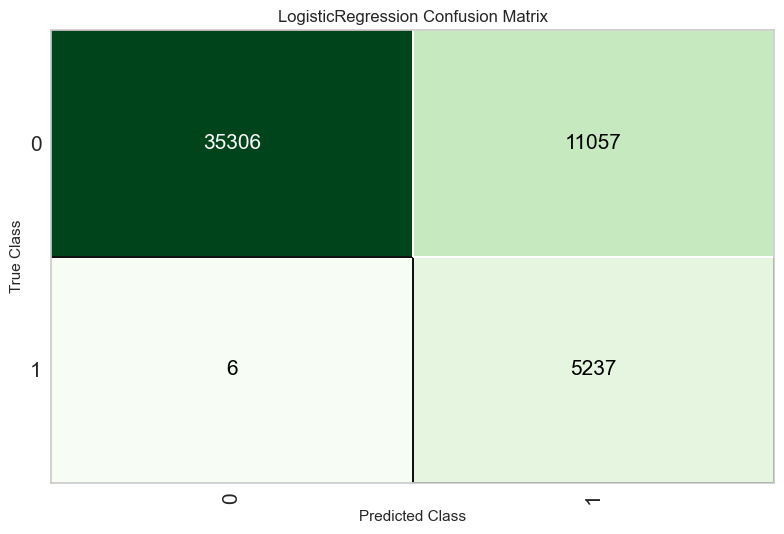

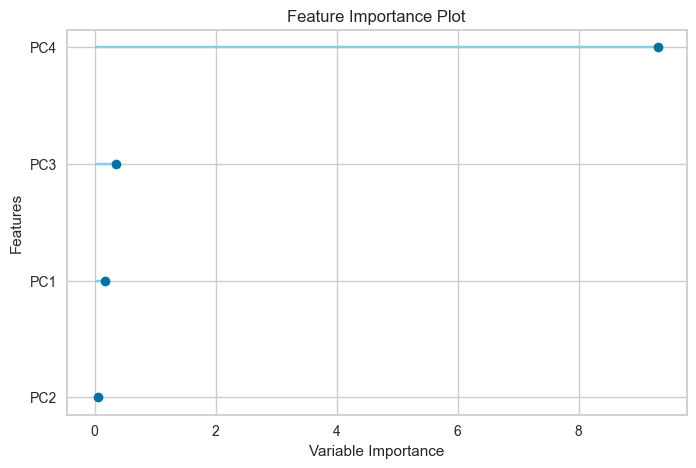

In [38]:
from pycaret.classification import tune_model, plot_model

print(f"\nAnalyzing best model from original data: {best_model_orig[0]}")
tuned_model_orig = tune_model(best_model_orig[0])
plot_model(tuned_model_orig, plot='confusion_matrix')
plot_model(tuned_model_orig, plot='feature')

In [39]:
# Get best hyperparameters for the best model
tuned_model_orig.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}


Analyzing best model from PCA data: GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:33:45
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8152,0.8870,0.7819,0.3283,0.4624,0.3726,0.4239
1,0.8107,0.8814,0.7582,0.3187,0.4487,0.3567,0.4056
2,0.8086,0.8828,0.7539,0.3151,0.4444,0.3515,0.4005
3,0.8110,0.8847,0.7923,0.3240,0.4599,0.3689,0.4233
4,0.8102,0.8820,0.7825,0.3216,0.4558,0.3643,0.4173
5,0.8114,0.8841,0.7612,0.3199,0.4505,0.3588,0.4081
6,0.8135,0.8890,0.7923,0.3273,0.4632,0.3731,0.4266
7,0.8166,0.8879,0.7939,0.3317,0.4680,0.3790,0.4318
8,0.8082,0.8838,0.7892,0.3201,0.4554,0.3634,0.4180


Fitting 10 folds for each of 10 candidates, totalling 100 fits


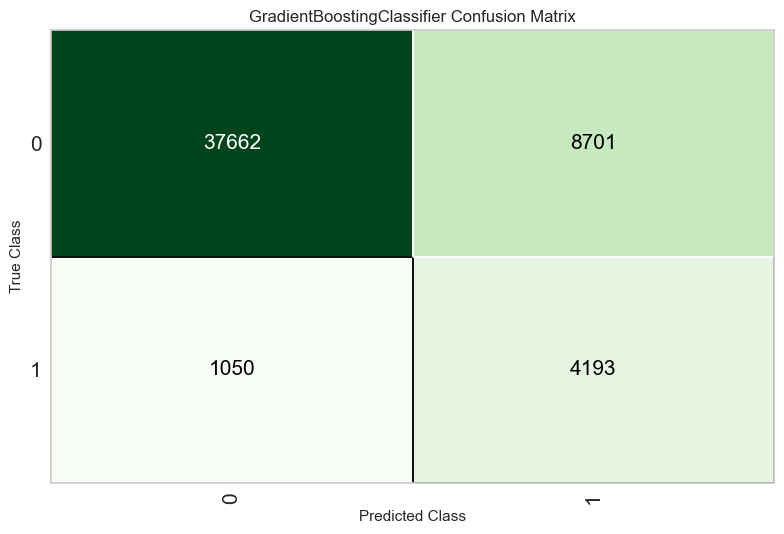

In [30]:
from pycaret.classification import tune_model, plot_model

print(f"\nAnalyzing best model from PCA data: {best_model_pca[0]}")
tuned_model_pca = tune_model(best_model_pca[0])
plot_model(tuned_model_pca, plot='confusion_matrix')

In [31]:
# Get best hyperparameters for the best model PCA
tuned_model_pca.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.4,
 'loss': 'log_loss',
 'max_depth': 8,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.1,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 280,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 0.5,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:11:02
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7858,0.8808,1.0000,0.3219,0.4870,0.3937,0.4951
1,0.7858,0.8797,0.9975,0.3216,0.4864,0.3930,0.4939
2,0.7838,0.8797,1.0000,0.3197,0.4845,0.3907,0.4927
3,0.7798,0.8774,1.0000,0.3156,0.4798,0.3848,0.4881
4,0.7810,0.8767,0.9967,0.3165,0.4804,0.3857,0.4879
5,0.7839,0.8790,0.9984,0.3195,0.4841,0.3903,0.4920
6,0.7851,0.8797,0.9984,0.3207,0.4855,0.3920,0.4933
7,0.7889,0.8818,0.9984,0.3246,0.4900,0.3976,0.4977
8,0.7749,0.8732,0.9967,0.3107,0.4737,0.3772,0.4812


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:14:47
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7925,0.8749,0.9706,0.3254,0.4874,0.3953,0.4884
1,0.7914,0.8742,0.9616,0.3232,0.4838,0.3911,0.4827
2,0.7888,0.8767,0.9681,0.3210,0.4822,0.3890,0.4828
3,0.7869,0.8714,0.9738,0.3197,0.4814,0.3878,0.4833
4,0.7873,0.8751,0.9681,0.3195,0.4804,0.3868,0.4810
5,0.7897,0.8751,0.9673,0.3219,0.4831,0.3901,0.4834
6,0.7915,0.8784,0.9689,0.3240,0.4857,0.3933,0.4864
7,0.7941,0.8788,0.9632,0.3261,0.4873,0.3956,0.4866
8,0.7824,0.8727,0.9706,0.3150,0.4756,0.3805,0.4767


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).

Confusion Matrix for Ada Boost (Original):


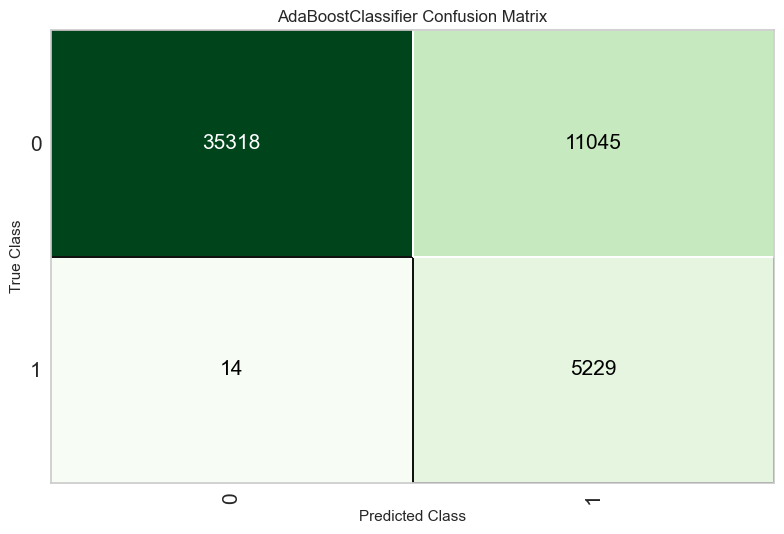


Confusion Matrix for Naive Bayes (Original):


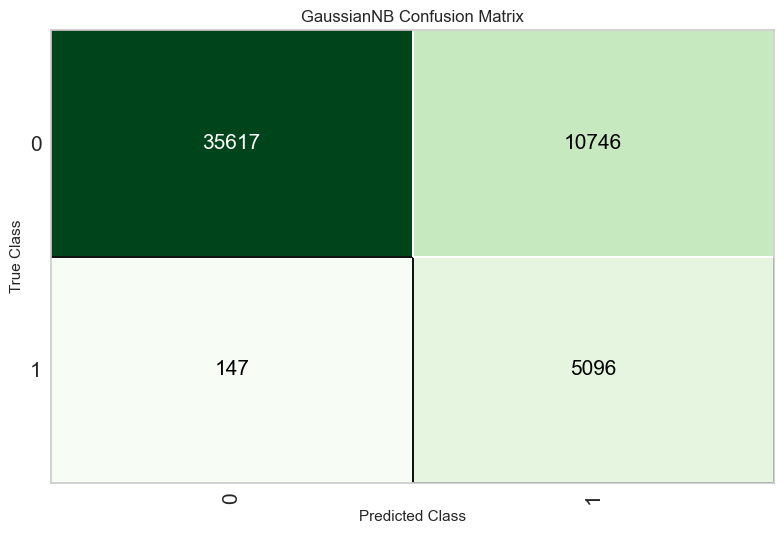

In [42]:
ada_original = tune_model(best_model_orig[2])
nb_original = tune_model(best_model_orig[1])

print("\nConfusion Matrix for Ada Boost (Original):")
plot_model(ada_original, plot='confusion_matrix')

print("\nConfusion Matrix for Naive Bayes (Original):")
plot_model(nb_original, plot='confusion_matrix')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:14:51
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7858,0.8808,1.0000,0.3219,0.4870,0.3937,0.4951
1,0.7858,0.8797,0.9975,0.3216,0.4864,0.3930,0.4939
2,0.7838,0.8797,1.0000,0.3197,0.4845,0.3907,0.4927
3,0.7798,0.8774,1.0000,0.3156,0.4798,0.3848,0.4881
4,0.7810,0.8767,0.9967,0.3165,0.4804,0.3857,0.4879
5,0.7839,0.8790,0.9984,0.3195,0.4841,0.3903,0.4920
6,0.7851,0.8797,0.9984,0.3207,0.4855,0.3920,0.4933
7,0.7889,0.8818,0.9984,0.3246,0.4900,0.3976,0.4977
8,0.7749,0.8732,0.9967,0.3107,0.4737,0.3772,0.4812


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:18:35
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7874,0.8871,0.9992,0.3234,0.4886,0.3958,0.4965
1,0.7879,0.8901,0.9992,0.3239,0.4892,0.3966,0.4971
2,0.7860,0.8902,1.0000,0.3218,0.4870,0.3938,0.4952
3,0.7825,0.8864,0.9992,0.3182,0.4827,0.3885,0.4908
4,0.7829,0.8882,0.9992,0.3186,0.4832,0.3891,0.4912
5,0.7858,0.8895,0.9992,0.3216,0.4866,0.3933,0.4946
6,0.7874,0.8939,0.9975,0.3230,0.4880,0.3952,0.4956
7,0.7908,0.8891,0.9984,0.3266,0.4922,0.4005,0.4999
8,0.7775,0.8856,0.9975,0.3133,0.4769,0.3811,0.4845


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).

Confusion Matrix for Ada Boost (PCA Data):


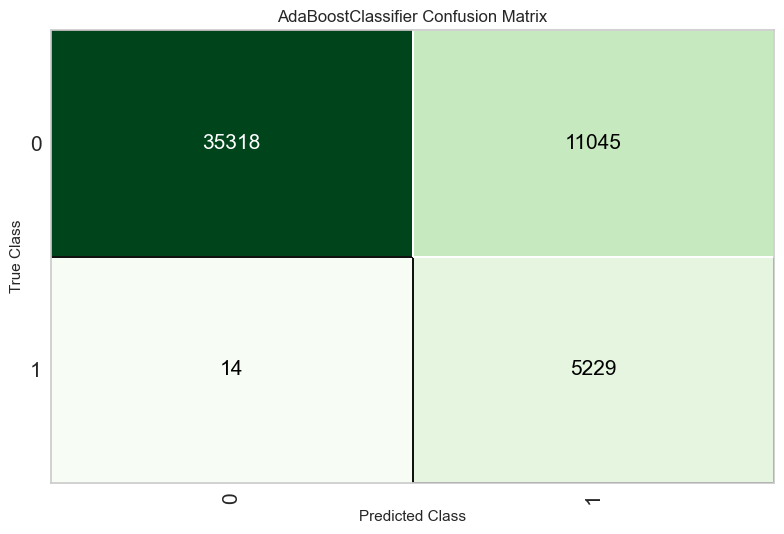


Confusion Matrix for Naive Bayes (PCA Data):


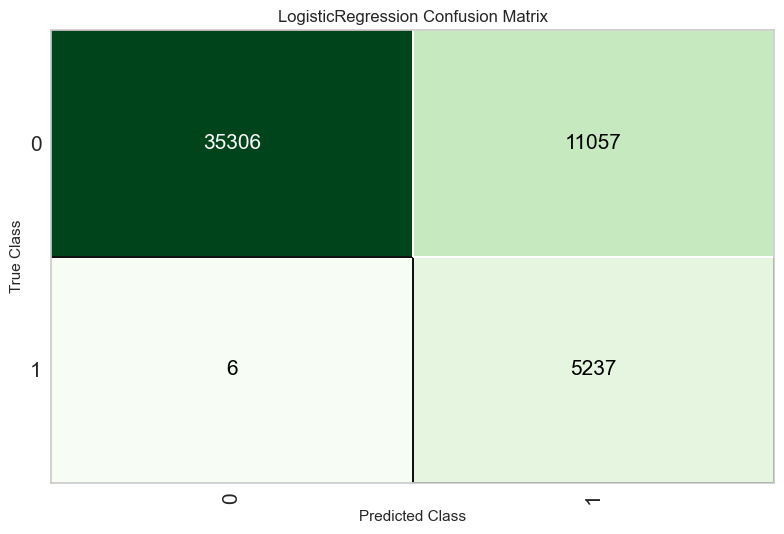

In [43]:
ada_pca = tune_model(best_model_pca[2])
lr_pca = tune_model(best_model_pca[1])

print("\nConfusion Matrix for Ada Boost (PCA Data):")
plot_model(ada_pca, plot='confusion_matrix')

print("\nConfusion Matrix for Naive Bayes (PCA Data):")
plot_model(lr_pca, plot='confusion_matrix')

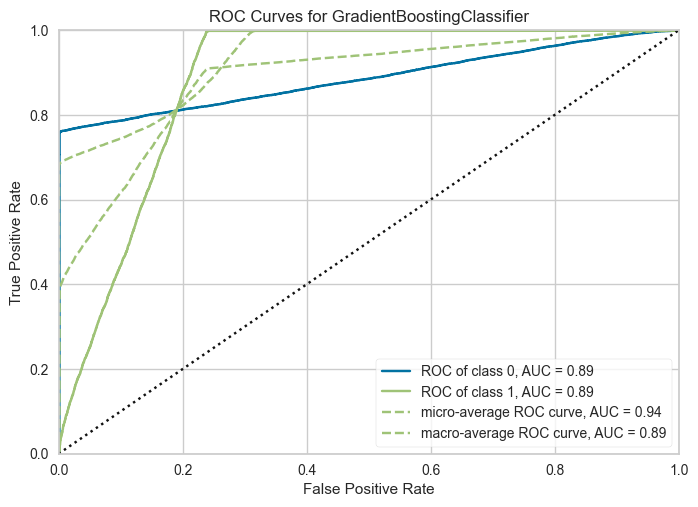

In [35]:
# plot AUC curve for best PCA Model
plot_model(tuned_model_pca, plot='auc')

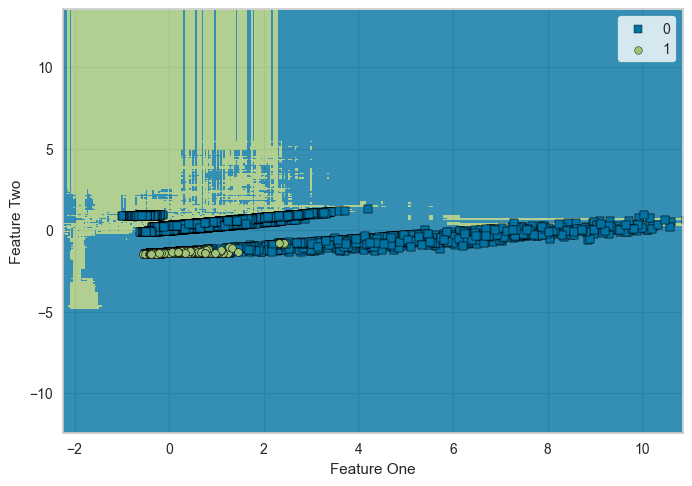

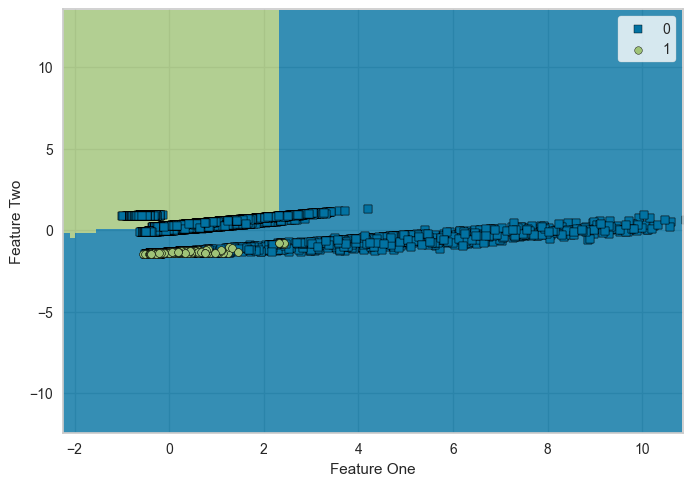

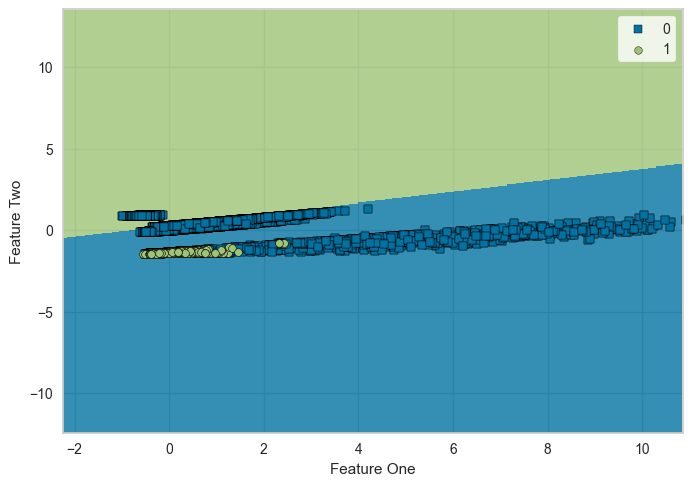

In [44]:
# Plot Decision Boundaries for All 3 PCA Models
plot_model(tuned_model_pca, plot='boundary')

plot_model(ada_pca, plot='boundary')

plot_model(lr_pca, plot='boundary')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:43:30
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8009,0.8830,0.8611,0.3212,0.4679,0.3755,0.4447
1,0.7999,0.8866,0.8709,0.3213,0.4694,0.3769,0.4482
2,0.7976,0.8875,0.9002,0.3223,0.4747,0.3823,0.4599
3,0.7959,0.8852,0.8806,0.3179,0.4671,0.3737,0.4481
4,0.7973,0.8854,0.8937,0.3211,0.4724,0.3798,0.4562
5,0.7969,0.8829,0.8594,0.3162,0.4623,0.3685,0.4387
6,0.8011,0.8898,0.8994,0.3262,0.4788,0.3875,0.4638
7,0.8035,0.8870,0.8913,0.3280,0.4795,0.3888,0.4628
8,0.7941,0.8825,0.8971,0.3182,0.4697,0.3761,0.4541


Fitting 10 folds for each of 10 candidates, totalling 100 fits


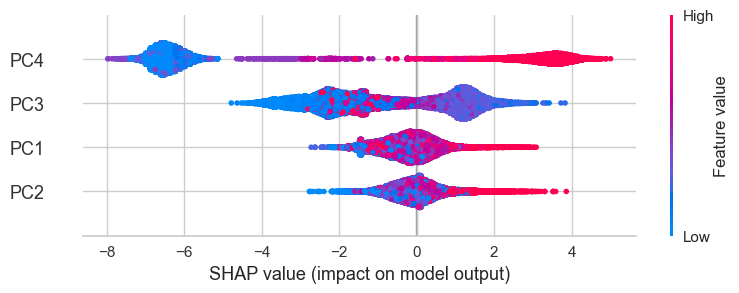

In [32]:
from pycaret.classification import interpret_model

lgbm_pca = tune_model(best_model_pca[3])

# SHAP Analysis for LGBM model
interpret_model(lgbm_pca, plot='summary')

In [33]:
# Force plot for a specific observation
interpret_model(lgbm_pca, plot='reason', observation=0)

## 9. Conclusion

In this analysis, we performed data cleaning, preprocessing, feature engineering, and modeling on the Insurance Fraud Detection dataset. We compared the performance of models on both the original cleaned data and the PCA-transformed data. The results indicate that PCA can significantly reduce dimensionality while retaining important information, leading to improved model performance.

In [287]:
print("\nComparison of Top 3 Models Performance (from compare_models):")
print("\nOriginal Data - Best Model Metrics:")
print(results_orig_compare.iloc[0])
print("\nOriginal Data - Second Best Model Metrics:")
print(results_orig_compare.iloc[1])
print("\nOriginal Data - Third Best Model Metrics:")
print(results_orig_compare.iloc[2])

print("\nPCA Data - Best Model Metrics:")
print(results_pca_compare.iloc[0])
print("\nPCA Data - Second Best Model Metrics:")
print(results_pca_compare.iloc[1])
print("\nPCA Data - Third Best Model Metrics:")
print(results_pca_compare.iloc[2])


Comparison of Top 3 Models Performance (from compare_models):

Original Data - Best Model Metrics:
Model       Logistic Regression
Accuracy                 0.7853
AUC                      0.8891
Recall                   0.9989
Prec.                    0.3211
F1                        0.486
Kappa                    0.3926
MCC                      0.4939
TT (Sec)                  0.178
Name: lr, dtype: object

Original Data - Second Best Model Metrics:
Model       Naive Bayes
Accuracy         0.7858
AUC              0.8808
Recall           0.9957
Prec.            0.3212
F1               0.4858
Kappa            0.3924
MCC              0.4929
TT (Sec)          0.074
Name: nb, dtype: object

Original Data - Third Best Model Metrics:
Model       Ada Boost Classifier
Accuracy                  0.7888
AUC                       0.8884
Recall                    0.9772
Prec.                     0.3222
F1                        0.4846
Kappa                     0.3916
MCC                       0.48